### Logistic Population Growth

&nbsp;

The logistic population growth model captures the growth of populations over time. It is a modification of the exponential growth model. It assumes limited amount of resources may inhibit population growth as the population approaches maximum capacity of the habitat. The equation is written below.

$\frac{dN}{dt} = r_{max} \times \frac {(K-N)} {K} \times N $

where

$N$ denotes the population size

$r_{max}$ denotes the intrinsic growth rate of the population (the rate at which the population would grow in the absence of limiting factors)

$K$ denotes maximum capacity (carrying capacity) of the environment

$t$ denotes time interval (could be discrete or continuous)

&nbsp;

Refer to the link below for more details of population growth model

https://www.khanacademy.org/science/ap-biology/ecology-ap/population-ecology-ap/a/exponential-logistic-growth#:~:text=In%20logistic%20growth%2C%20a%20population's,produces%20an%20S%2Dshaped%20curve.

In [6]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pandas as pd

### get data

This script uses Tasmanian devils on Tasman peninsula as an example. The Tasmanian devil experiment on Tasman peninsula began in 2012 and involves the relocation of healthy Tasmanian devils from mainland Tasmania to Tasman peninsula. The goal of the program is to establish a healthy population of Tasmanian devils on Tasman peninsula that can eventually be reintroduced to the mainland to help bolster the wild population. Tasman peninsula is effectively the perfect spot without any external mortality factors. Thus, it is the best dataset for logistic population growth.



In [1]:
target=[
 22.857142857142858,
 28.88888888888889,
 54.0,
 116.21739130434783]

### functions

In [2]:
#discrete time logistic population growth
def logistic_growth(population,t,unknown):    
    r_max,K=unknown
    N=population[0]
    dNdt=r_max*(K-N)*N/K    
    return [dNdt]

$\frac{dN}{dt} = r_{max} \times \frac {(K-N)} {K} \times N $

In [3]:
#form a dynamic system
def dynamicsystem(unknown):
    
    t=range(len(target))
        
    #create a list to store fitted values
    fitted=[None]*len(t)
    
    #initial value
    fitted[0]=target[0]
    
    #population zero
    N0=target[0]
    
    
    #compute the fitted value via iterations
    for i in range(1,len(t)):
        
        interval=[t[i-1],t[i]]        
            
        ans=odeint(func=logistic_growth,y0=N0,t=interval,args=(unknown,))
            
        #each iteration, the last fitted value becomes the initial value
        N0=ans[-1]
        
        #update fitted via each iteration
        fitted[i]=ans[-1][0]
                
    return fitted

In [4]:
#the cost of least square is the sum of squared error
def costfunction(unknown):    
    fitted=dynamicsystem(unknown)    
    cost=np.square(np.subtract(np.array(fitted),np.array(target))).sum()
    return cost

In [7]:
#using non linear least square to estimate the parameters of dynamic system
def estimate(r_max_guess=0.5,K_guess=500,diagnosis=False,**kwargs):
       
    #sum of squared error from initial guess
    sse=costfunction((r_max_guess,K_guess))
    
    if diagnosis:
        print(f'Initial SSE: {round(sse,2)}')
    
    lse=minimize(costfunction,x0=(r_max_guess,K_guess),
                 method='Nelder-Mead')
        
    if lse.success:   
        
        #sum of squared error from successful result
        r_max,K=lse.x
        sse=costfunction((r_max,K))
        
        if diagnosis:
            print(f'Result SSE: {round(sse,2)}')
        
        return r_max,K
        
    else:
        if diagnosis:
            print(lse)
        return 0,0

### run

In [8]:
r_max,K=estimate(diagnosis=True)

Initial SSE: 847.78
       message: Maximum number of function evaluations has been exceeded.
       success: False
        status: 1
           fun: 256.76742420588323
             x: [ 5.255e-01  4.848e+15]
           nit: 219
          nfev: 400
 final_simplex: (array([[ 5.255e-01,  4.848e+15],
                       [ 5.255e-01,  4.993e+15],
                       [ 5.255e-01,  4.717e+15]]), array([ 2.568e+02,  2.568e+02,  2.568e+02]))


In [9]:
print(r_max,K)

0 0


C:\Users\tm\AppData\Local\Temp\ipykernel_24564\2459264422.py:5: RuntimeWarning: invalid value encountered in scalar divide
  dNdt=r_max*(K-N)*N/K


ValueError: x and y must have same first dimension, but have shapes (7,) and (4,)

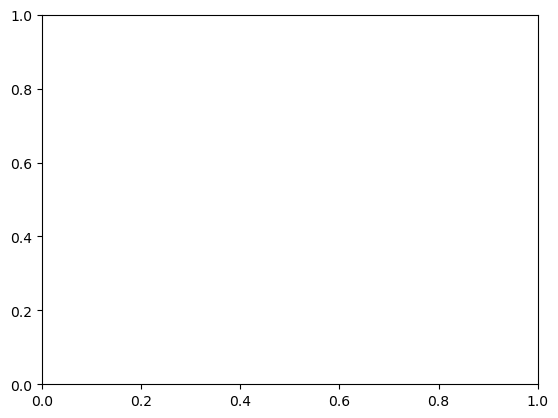

In [18]:
plt.plot(range(2012,2019),dynamicsystem((r_max,K)),label='fitted')
plt.scatter(range(2012,2019),target,c='red',label='actual')
plt.title('Tasman peninsula Logistic Population Growth')
plt.xlabel('Year')
plt.ylabel('Number of Tasmanian devils')
plt.legend()
plt.show()